# IMPORT LIBRARIES:

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore',category=UserWarning)

from kmedoids import KMedoids

import scipy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import skfuzzy as fuzz
from skfuzzy import control as ctrl


# DATA EXPLORATION:

In [55]:
real_data=pd.read_csv("C:\\Users\\BCC\\OneDrive\\Pictures\\Healthcare-Diabetes.csv")
real_data = pd.DataFrame(real_data)
print ("few first data")
real_data.head(10)

few first data


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [56]:
print ("few last data")
real_data.tail(10)

few last data


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2758,2759,3,111,90,12,78,28.4,0.495,29,0
2759,2760,6,102,82,0,0,30.8,0.180,36,1
2760,2761,6,134,70,23,130,35.4,0.542,29,1
2761,2762,2,87,0,23,0,28.9,0.773,25,0
2762,2763,1,79,60,42,48,43.5,0.678,23,0
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [57]:
print("information of data")
real_data.info()

information of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [58]:
print("description of data")
real_data.describe()

description of data


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


# Data Cleaning:

In [59]:
print("missing value : \n\n",real_data.isnull().sum())

missing value : 

 Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [60]:
print("duplicated value = ",real_data.duplicated().sum(),"\n\n")


duplicated value =  0 




In [61]:
col_replace = ["Glucose", "BloodPressure","BMI"]
# I will first replace 0 values with Nulls then calculate median.
real_data[col_replace] = real_data[col_replace].replace(0, np.nan)
med = real_data[col_replace].median()
real_data[col_replace] = real_data[col_replace].fillna(med)
real_data.describe()


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.863439,72.385838,20.824422,80.127890,32.593895,0.471193,33.132225,0.343931
std,799.197097,3.323801,30.503499,11.988549,16.059596,112.301933,7.103462,0.325669,11.777230,0.475104
min,1.000000,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.575000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.400000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


find the outliers

Display the outliers : 




(2768, 10)

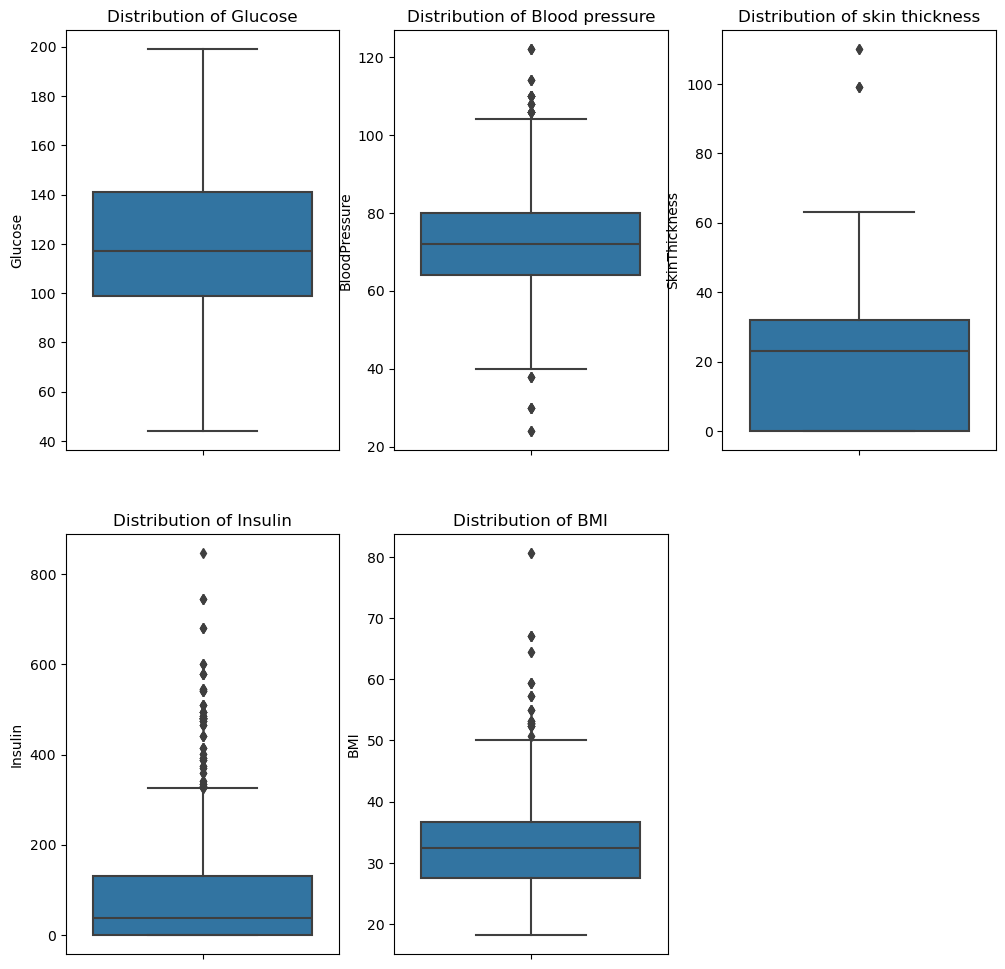

In [62]:
print("Display the outliers : \n\n")
plt.figure(figsize=(12,12))

plt.subplot(2, 3, 1)
sns.boxplot(y='Glucose', data=real_data)
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.boxplot(y='BloodPressure', data=real_data)
plt.title('Distribution of Blood pressure')

plt.subplot(2, 3, 3)
sns.boxplot(y='SkinThickness', data=real_data)
plt.title('Distribution of skin thickness')

plt.subplot(2, 3, 4)
sns.boxplot(y='Insulin', data=real_data)
plt.title('Distribution of Insulin')

plt.subplot(2, 3, 5)
sns.boxplot(y='BMI', data=real_data)
plt.title('Distribution of BMI')
real_data.shape

Removing The Outliers

After removing unused outliers : 

 


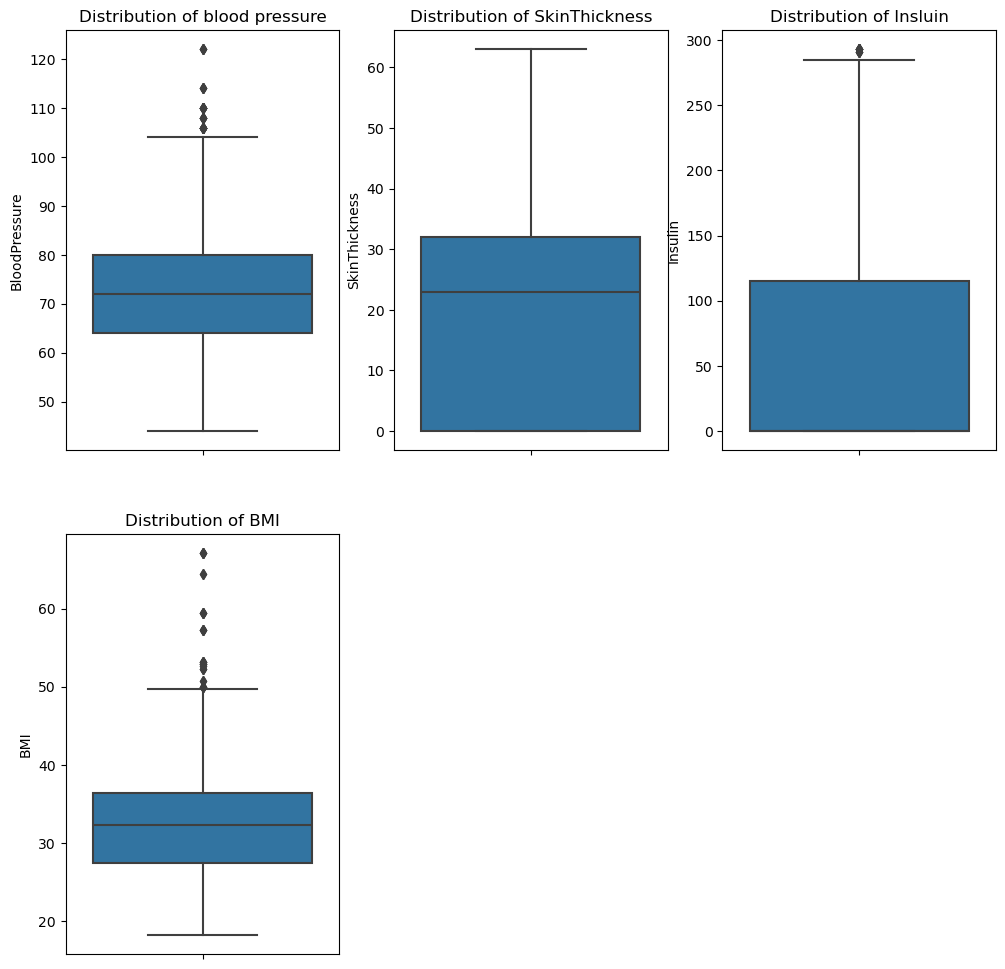

In [63]:
print("After removing unused outliers : \n\n ")

plt.figure(figsize=(12,12))

data= real_data[(real_data['BloodPressure']>40) ]
plt.subplot(2, 3, 1)
sns.boxplot(y='BloodPressure', data=data)
plt.title('Distribution of blood pressure')

data= data[(data['SkinThickness']<80) ]
plt.subplot(2, 3, 2)
sns.boxplot(y='SkinThickness', data=data)
plt.title('Distribution of SkinThickness')

data= data[(data['Insulin']<300) ]
plt.subplot(2, 3, 3)
sns.boxplot(y='Insulin', data=data)
plt.title('Distribution of Insluin')

data= data[(data['BMI']<70) ]
plt.subplot(2, 3, 4)
sns.boxplot(y='BMI', data=data)
plt.title('Distribution of BMI')

data.reset_index(drop=True,inplace=True)

In [64]:
print("Shape of original data:", real_data.shape)
print("Shape of cleaned data:", data.shape)

Shape of original data: (2768, 10)
Shape of cleaned data: (2613, 10)


# DATA VISUALIZATION:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


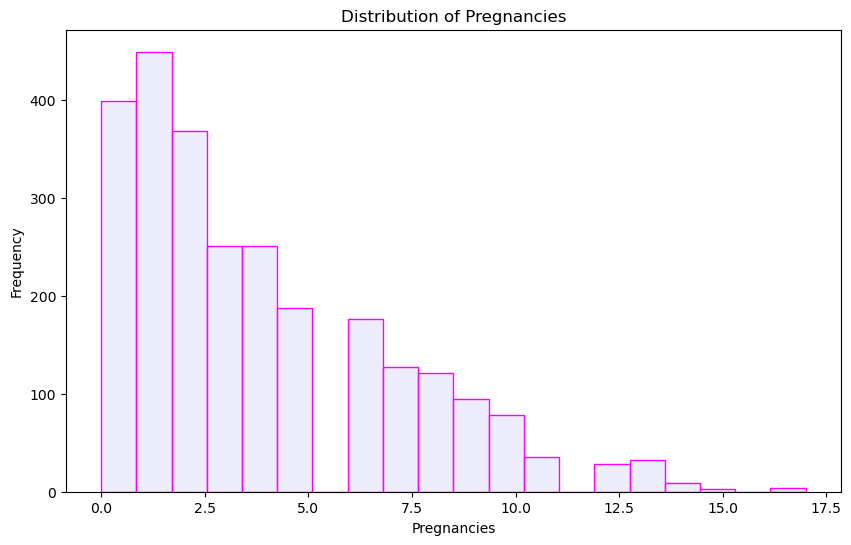

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Pregnancies'], bins=20 , color ="Lavender", edgecolor='Magenta')
plt.title('Distribution of Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


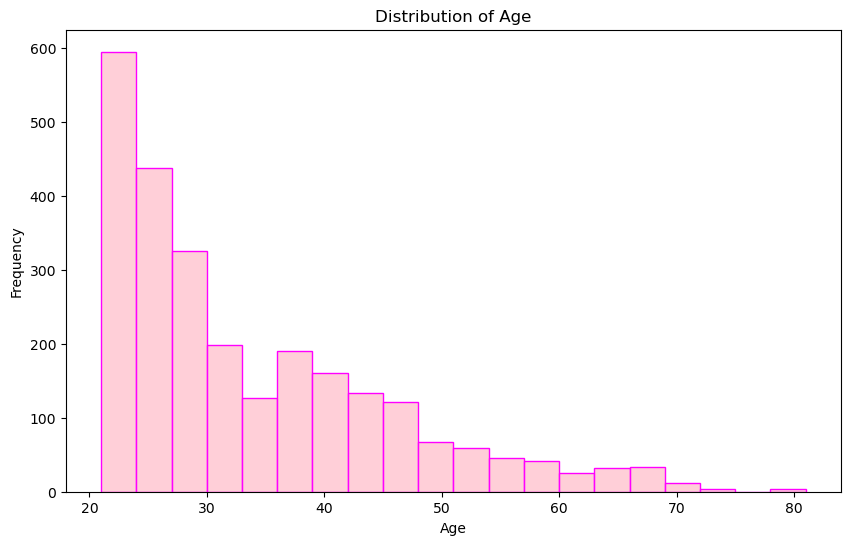

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20 , color ="pink", edgecolor='Magenta')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Outcome percentages:
Outcome
0    66.781477
1    33.218523
Name: count, dtype: float64


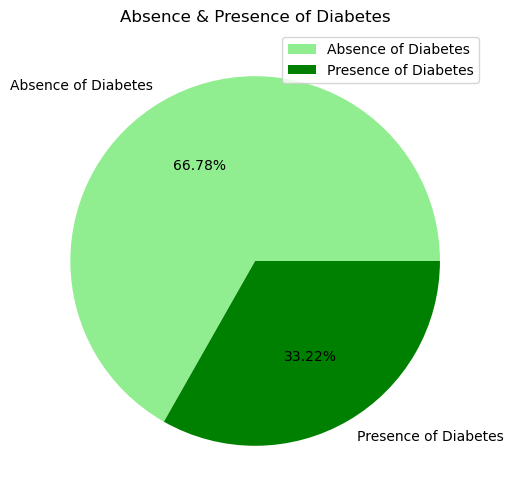

In [67]:
plt.figure(figsize=(8, 6))
labels = ["Absence of Diabetes", "Presence of Diabetes"]
color=["lightgreen","green"]
outcome_counts = data['Outcome'].value_counts()
plt.pie (outcome_counts, colors = color , labels = labels ,autopct='%1.2f%%'  )
plt.legend()
plt.title ("Absence & Presence of Diabetes")
total = sum(outcome_counts)
percentages= (outcome_counts / total) * 100
print("Outcome percentages:")
print(percentages)
plt.show()

<Figure size 400x300 with 0 Axes>

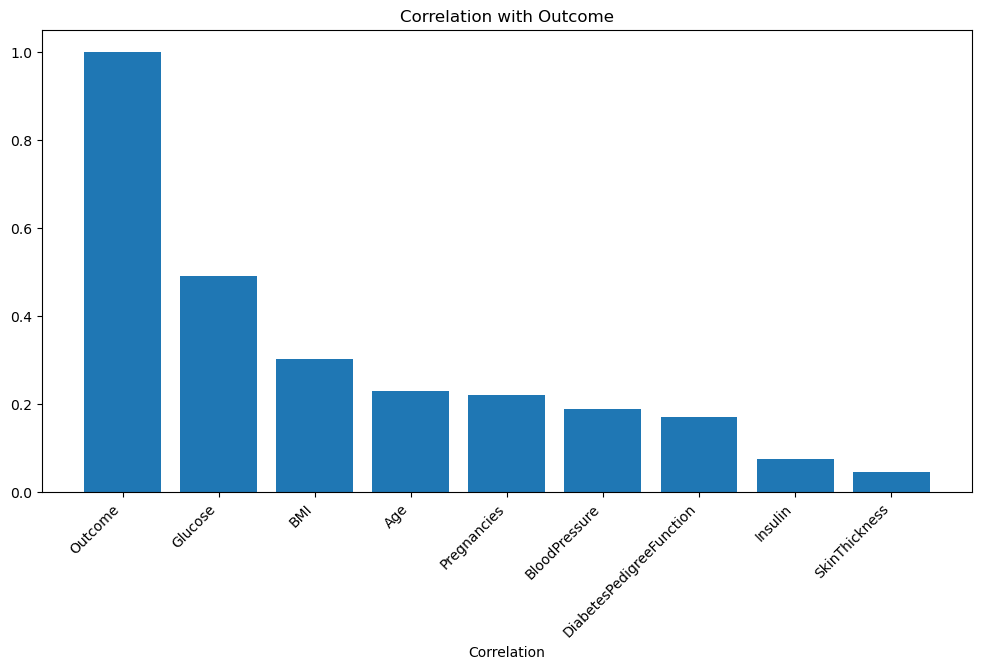

<Figure size 1200x600 with 0 Axes>

In [68]:
plt.figure(figsize=(4, 3))
noiddata = data.drop('Id', axis=1)
correlation_with_outcome = noiddata.corrwith(noiddata['Outcome']).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(correlation_with_outcome.index, correlation_with_outcome.values)
plt.title('Correlation with Outcome')
plt.xlabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(12, 6))
plt.show()

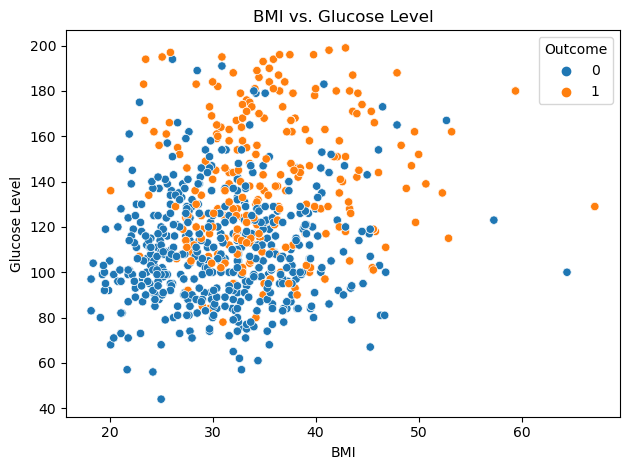

In [69]:
sns.scatterplot(x='BMI', y='Glucose', data=data, hue='Outcome')
plt.title('BMI vs. Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.tight_layout()
plt.show()

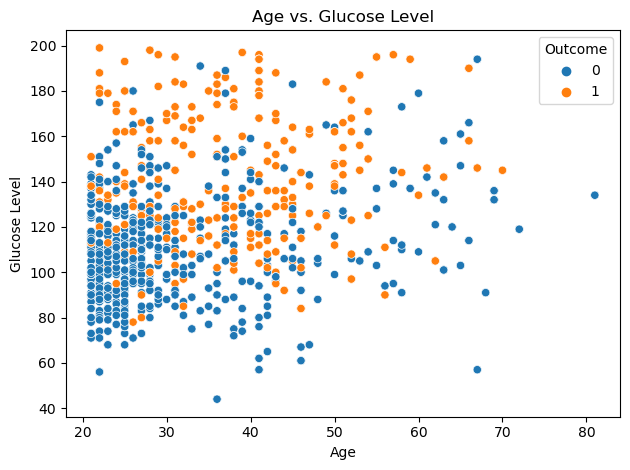

In [70]:
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=data)
plt.title('Age vs. Glucose Level')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.tight_layout()
plt.show()

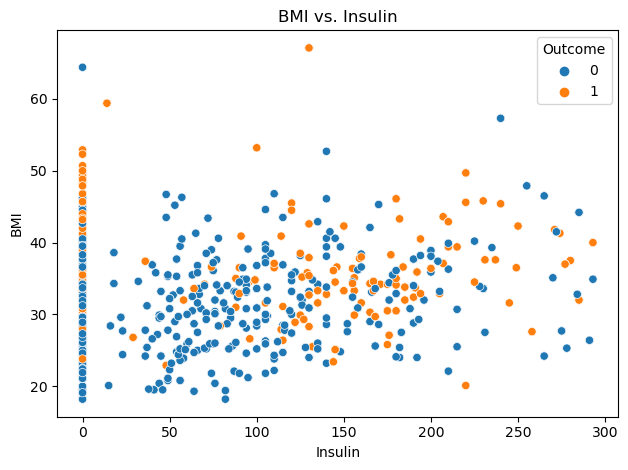

In [71]:
sns.scatterplot(x='Insulin', y='BMI', data=data, hue='Outcome')
plt.title('BMI vs. Insulin')
plt.xlabel('Insulin')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

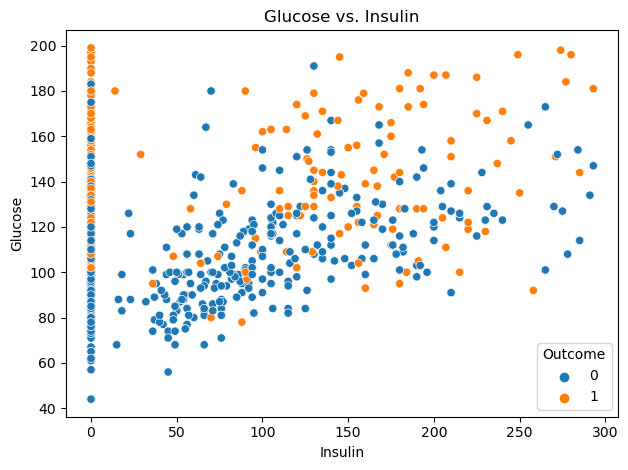

In [72]:
sns.scatterplot(x='Insulin', y='Glucose', data=data, hue='Outcome')
plt.title('Glucose vs. Insulin')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.tight_layout()
plt.show()

# K-MEDOID CLUSTERING METHOD:

labels [2 1 0 ... 0 2 1] 

clusters [[30.8  0. ]
 [27.8 22. ]
 [36.5 36. ]] 



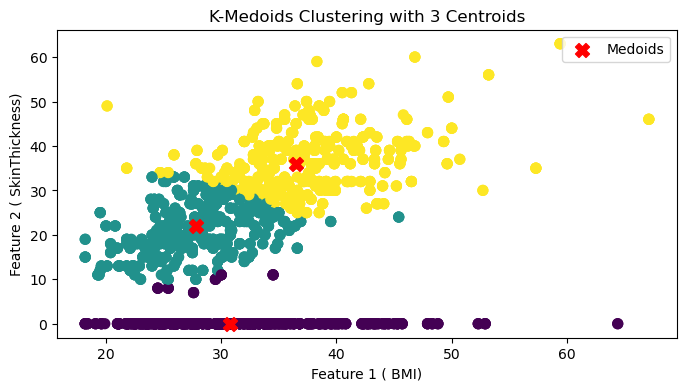

cluster 0 : [23.3  0. ]
cluster 0 : [25.6  0. ]
cluster 0 : [35.3  0. ]
cluster 0 : [32.4  0. ]
cluster 0 : [37.6  0. ]
cluster 0 : [38.  0.]
cluster 0 : [27.1  0. ]
cluster 0 : [30.  0.]
cluster 0 : [29.6  0. ]
cluster 0 : [35.4  0. ]
cluster 0 : [39.8  0. ]
cluster 0 : [39.4  0. ]
cluster 0 : [34.1  0. ]
cluster 0 : [19.9  0. ]
cluster 0 : [33.2  0. ]
cluster 0 : [40.2  0. ]
cluster 0 : [27.4  0. ]
cluster 0 : [29.7  0. ]
cluster 0 : [32.4  0. ]
cluster 0 : [40.5  0. ]
cluster 0 : [32.4  0. ]
cluster 0 : [32.9  0. ]
cluster 0 : [25.  0.]
cluster 0 : [32.8  0. ]
cluster 0 : [42.7  0. ]
cluster 0 : [43.4  0. ]
cluster 0 : [32.6  0. ]
cluster 0 : [43.2  0. ]
cluster 0 : [32.4  0. ]
cluster 0 : [48.8  0. ]
cluster 0 : [19.1  0. ]
cluster 0 : [23.8  0. ]
cluster 0 : [39.  0.]
cluster 0 : [26.1  0. ]
cluster 0 : [22.5  0. ]
cluster 0 : [39.6  0. ]
cluster 0 : [22.4  0. ]
cluster 0 : [34.  0.]
cluster 0 : [31.2  0. ]
cluster 0 : [34.  0.]
cluster 0 : [33.7  0. ]
cluster 0 : [26.8  0. ]
clus

In [73]:
df = data[['BMI', 'SkinThickness']].to_numpy()
k=3
kmedoids = KMedoids(n_clusters=k, metric='manhattan').fit(df)
labels = kmedoids.labels_
clusters = kmedoids.cluster_centers_
print("labels",labels,"\n")
print("clusters",clusters,"\n")

plt.figure(figsize=(8, 4))
plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red', marker='X', s=100, label='Medoids')
plt.xlabel('Feature 1 ( BMI)')
plt.ylabel('Feature 2 ( SkinThickness)')
plt.title('K-Medoids Clustering with 3 Centroids')
plt.legend()
plt.show()

for j in range(k):
    for i in range(len(df)):
      if( kmedoids.labels_[i]==[j]):
            x=df[i]
            print("cluster",j,":",x)


labels [0 2 2 ... 0 3 3] 

clusters [[72. 41.]
 [84. 46.]
 [62. 23.]
 [76. 26.]] 



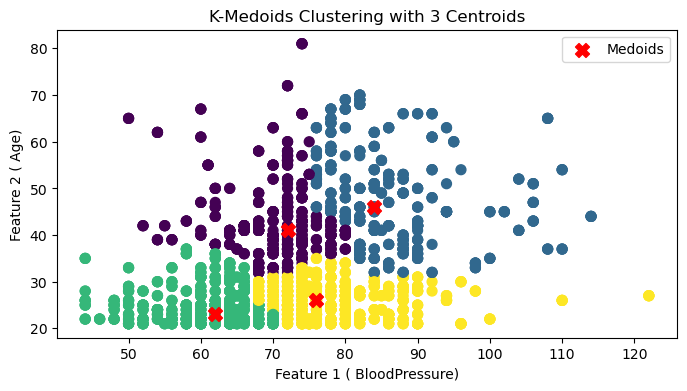

cluster 0 : [72. 50.]
cluster 0 : [74. 34.]
cluster 0 : [72. 51.]
cluster 0 : [72. 32.]
cluster 0 : [70. 32.]
cluster 0 : [70. 41.]
cluster 0 : [76. 43.]
cluster 0 : [75. 60.]
cluster 0 : [72. 56.]
cluster 0 : [64. 40.]
cluster 0 : [72. 39.]
cluster 0 : [66. 42.]
cluster 0 : [78. 41.]
cluster 0 : [78. 36.]
cluster 0 : [72. 45.]
cluster 0 : [70. 43.]
cluster 0 : [78. 42.]
cluster 0 : [72. 60.]
cluster 0 : [72. 40.]
cluster 0 : [72. 33.]
cluster 0 : [54. 39.]
cluster 0 : [74. 38.]
cluster 0 : [70. 33.]
cluster 0 : [74. 39.]
cluster 0 : [66. 42.]
cluster 0 : [80. 41.]
cluster 0 : [65. 37.]
cluster 0 : [78. 43.]
cluster 0 : [72. 47.]
cluster 0 : [74. 45.]
cluster 0 : [74. 41.]
cluster 0 : [68. 34.]
cluster 0 : [72. 36.]
cluster 0 : [78. 42.]
cluster 0 : [74. 40.]
cluster 0 : [68. 41.]
cluster 0 : [70. 40.]
cluster 0 : [66. 36.]
cluster 0 : [72. 40.]
cluster 0 : [55. 42.]
cluster 0 : [68. 32.]
cluster 0 : [72. 55.]
cluster 0 : [70. 38.]
cluster 0 : [68. 32.]
cluster 0 : [66. 41.]
cluster 0 

In [74]:

df = data[['BloodPressure', 'Age']].to_numpy()
k=4
kmedoids = KMedoids(n_clusters=k, metric='manhattan').fit(df)
labels = kmedoids.labels_
clusters = kmedoids.cluster_centers_
print("labels",labels,"\n")
print("clusters",clusters,"\n")

plt.figure(figsize=(8, 4))
plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red', marker='X', s=100, label='Medoids')
plt.xlabel('Feature 1 ( BloodPressure)')
plt.ylabel('Feature 2 ( Age)')
plt.title('K-Medoids Clustering with 3 Centroids')
plt.legend()
plt.show()

for j in range(k):
    for i in range(len(df)):
      if( kmedoids.labels_[i]==[j]):
            x=df[i]
            print("cluster",j,":",x)


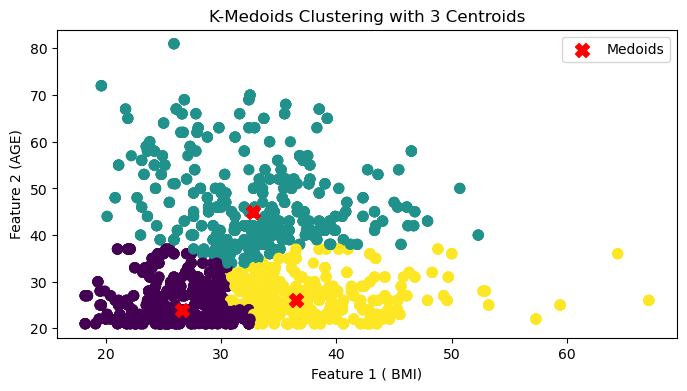

labels [1 0 0 ... 1 2 0] 

clusters [[26.6 24. ]
 [32.8 45. ]
 [36.5 26. ]] 

cluster 0 : [26.6 31. ]
cluster 0 : [23.3 32. ]
cluster 0 : [28.1 21. ]
cluster 0 : [25.6 30. ]
cluster 0 : [30. 32.]
cluster 0 : [29.6 31. ]
cluster 0 : [29. 29.]
cluster 0 : [23.2 22. ]
cluster 0 : [24.8 22. ]
cluster 0 : [19.9 28. ]
cluster 0 : [24. 33.]
cluster 0 : [29.7 29. ]
cluster 0 : [28. 22.]
cluster 0 : [32.4 24. ]
cluster 0 : [19.4 22. ]
cluster 0 : [24.2 26. ]
cluster 0 : [24.4 30. ]
cluster 0 : [23. 21.]
cluster 0 : [32.4 21. ]
cluster 0 : [25. 36.]
cluster 0 : [25.4 24. ]
cluster 0 : [29. 32.]
cluster 0 : [19.6 25. ]
cluster 0 : [28.9 27. ]
cluster 0 : [28.6 26. ]
cluster 0 : [32. 22.]
cluster 0 : [24.7 22. ]
cluster 0 : [25. 24.]
cluster 0 : [22.4 22. ]
cluster 0 : [32.4 22. ]
cluster 0 : [24.6 22. ]
cluster 0 : [26.5 24. ]
cluster 0 : [19.1 21. ]
cluster 0 : [24.7 21. ]
cluster 0 : [31.6 24. ]
cluster 0 : [20.4 22. ]
cluster 0 : [28.7 23. ]
cluster 0 : [26.1 22. ]
cluster 0 : [22.5 21. ]
clus

In [75]:
df = data[['BMI', 'Age']].to_numpy()
k=3
kmedoids = KMedoids(n_clusters=k, metric='manhattan').fit(df)
labels = kmedoids.labels_
clusters = kmedoids.cluster_centers_

plt.figure(figsize=(8, 4))
plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red', marker='X', s=100, label='Medoids')
plt.xlabel('Feature 1 ( BMI)')
plt.ylabel('Feature 2 (AGE)')
plt.title('K-Medoids Clustering with 3 Centroids')
plt.legend()
plt.show()
print("labels",labels,"\n")
print("clusters",clusters,"\n")
for j in range(k):
    for i in range(len(df)):
      if( kmedoids.labels_[i]==[j]):
            x=df[i]
            print("cluster",j,":",x)


# HIERARCHICAL CLUSTERING METHOD:

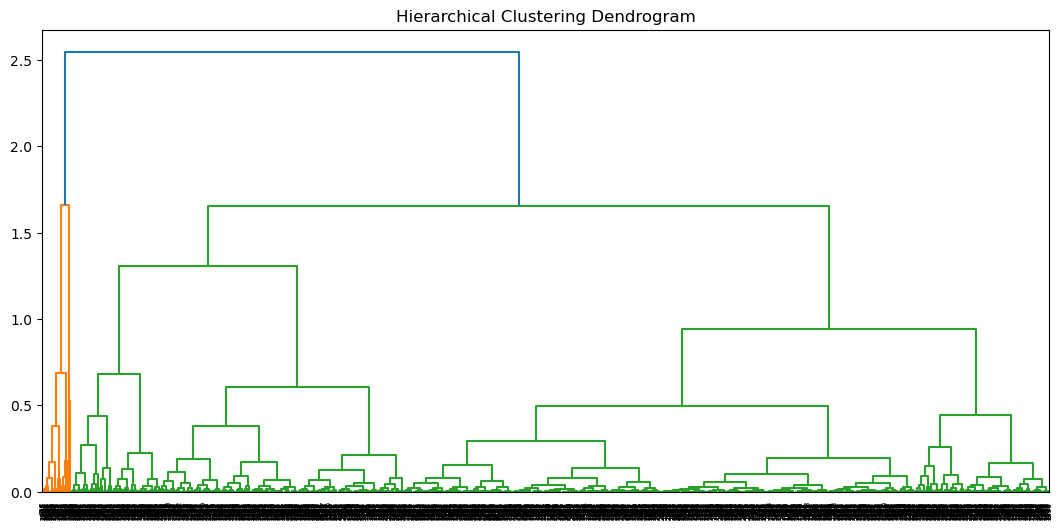

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,1,6,148.0,72.0,35,0,33.6,0.627,50,1,1
1,2,1,85.0,66.0,29,0,26.6,0.351,31,0,1
2,3,8,183.0,64.0,0,0,23.3,0.672,32,1,1
3,4,1,89.0,66.0,23,94,28.1,0.167,21,0,1
4,6,5,116.0,74.0,0,0,25.6,0.201,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2608,2764,2,75.0,64.0,24,55,29.7,0.370,33,0,1
2609,2765,8,179.0,72.0,42,130,32.7,0.719,36,1,1
2610,2766,6,85.0,78.0,0,0,31.2,0.382,42,0,1
2611,2767,0,129.0,110.0,46,130,67.1,0.319,26,1,1


In [79]:
numeric_cols = ['DiabetesPedigreeFunction','Outcome']
data_for_clustering = data[numeric_cols]
linkage_matrix = linkage(data_for_clustering, method='complete', metric='euclidean')
plt.figure(figsize=(13,6))
dendrogram(linkage_matrix,orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
data['cluster'] = fcluster(linkage_matrix, 2)
data

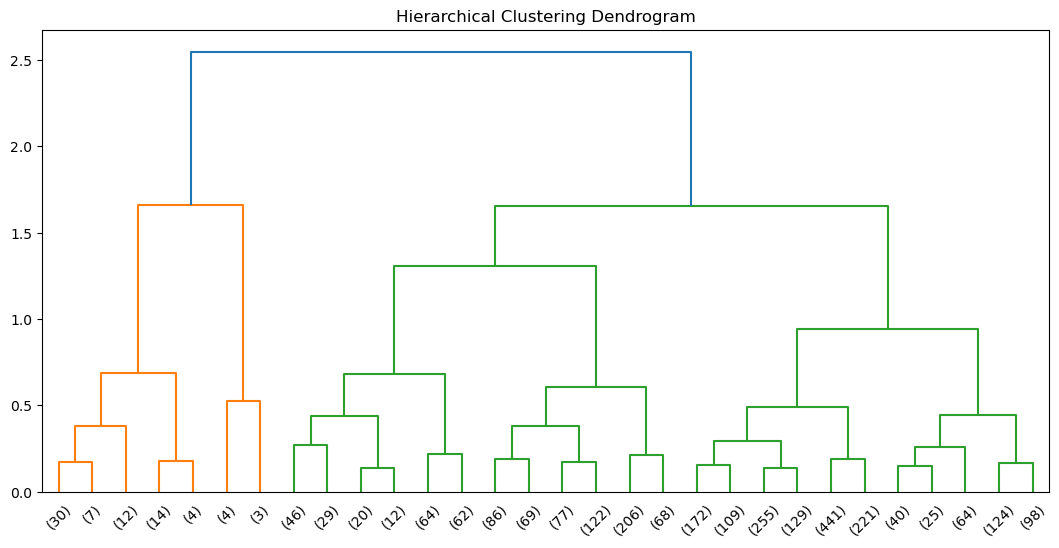

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,1,6,148.0,72.0,35,0,33.6,0.627,50,1,1
1,2,1,85.0,66.0,29,0,26.6,0.351,31,0,1
2,3,8,183.0,64.0,0,0,23.3,0.672,32,1,1
3,4,1,89.0,66.0,23,94,28.1,0.167,21,0,1
4,6,5,116.0,74.0,0,0,25.6,0.201,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2608,2764,2,75.0,64.0,24,55,29.7,0.370,33,0,1
2609,2765,8,179.0,72.0,42,130,32.7,0.719,36,1,1
2610,2766,6,85.0,78.0,0,0,31.2,0.382,42,0,1
2611,2767,0,129.0,110.0,46,130,67.1,0.319,26,1,1


In [76]:
numeric_cols = ['DiabetesPedigreeFunction','Outcome']
data_for_clustering = data[numeric_cols]
linkage_matrix = linkage(data_for_clustering, method='complete', metric='euclidean')
plt.figure(figsize=(13,6))
dendrogram(linkage_matrix,orientation='top',truncate_mode='lastp', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
data['cluster'] = fcluster(linkage_matrix, 2)
data

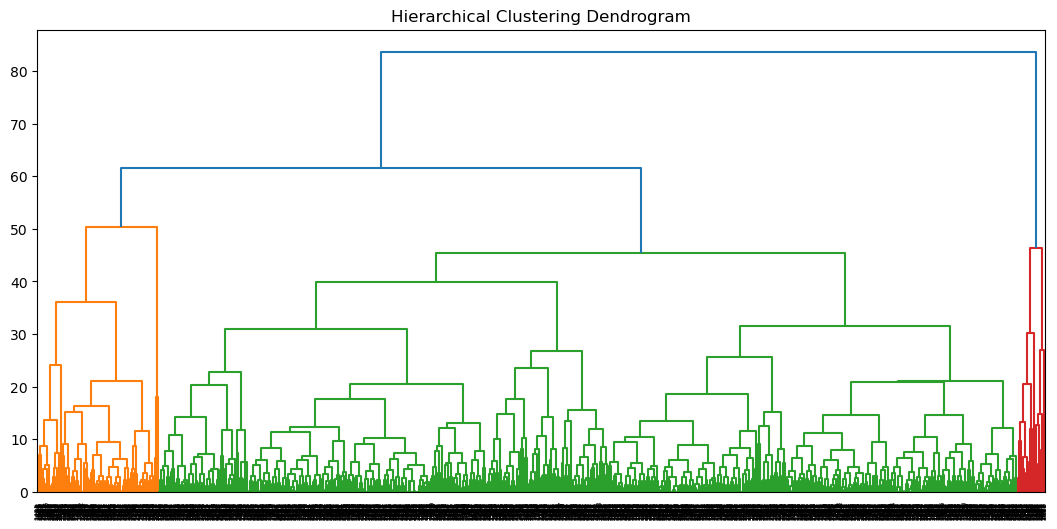

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,1,6,148.0,72.0,35,0,33.6,0.627,50,1,1
1,2,1,85.0,66.0,29,0,26.6,0.351,31,0,1
2,3,8,183.0,64.0,0,0,23.3,0.672,32,1,1
3,4,1,89.0,66.0,23,94,28.1,0.167,21,0,1
4,6,5,116.0,74.0,0,0,25.6,0.201,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2608,2764,2,75.0,64.0,24,55,29.7,0.370,33,0,1
2609,2765,8,179.0,72.0,42,130,32.7,0.719,36,1,1
2610,2766,6,85.0,78.0,0,0,31.2,0.382,42,0,1
2611,2767,0,129.0,110.0,46,130,67.1,0.319,26,1,1


In [80]:
numeric_cols = ['Pregnancies','BMI','BloodPressure']
data_for_clustering = data[numeric_cols]
linkage_matrix = linkage(data_for_clustering, method='complete', metric='euclidean')
plt.figure(figsize=(13,6))
dendrogram(linkage_matrix,orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
data['cluster'] = fcluster(linkage_matrix, 2)
data

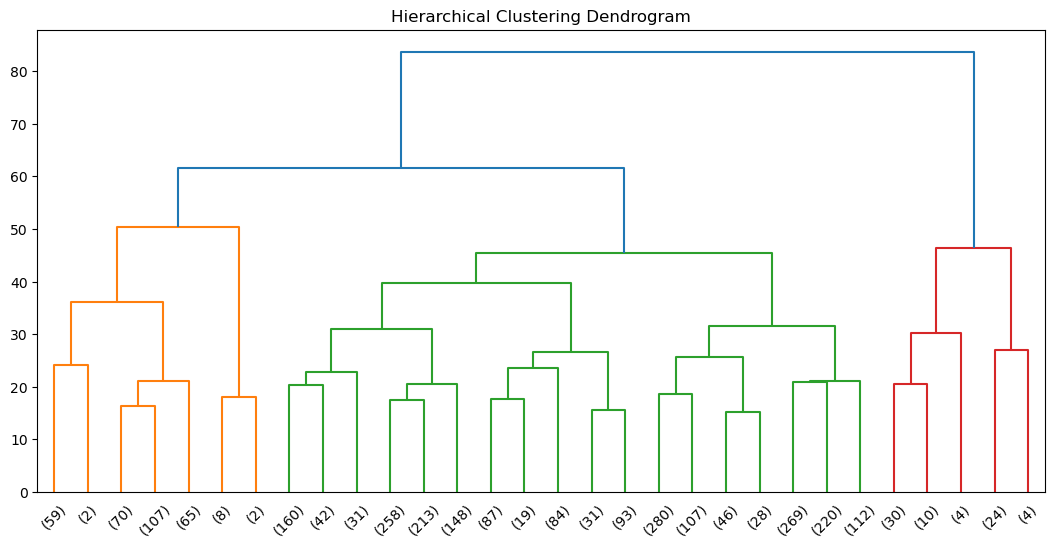

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,1,6,148.0,72.0,35,0,33.6,0.627,50,1,1
1,2,1,85.0,66.0,29,0,26.6,0.351,31,0,1
2,3,8,183.0,64.0,0,0,23.3,0.672,32,1,1
3,4,1,89.0,66.0,23,94,28.1,0.167,21,0,1
4,6,5,116.0,74.0,0,0,25.6,0.201,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2608,2764,2,75.0,64.0,24,55,29.7,0.370,33,0,1
2609,2765,8,179.0,72.0,42,130,32.7,0.719,36,1,1
2610,2766,6,85.0,78.0,0,0,31.2,0.382,42,0,1
2611,2767,0,129.0,110.0,46,130,67.1,0.319,26,1,1


In [77]:
numeric_cols = ['Pregnancies','BMI','BloodPressure']
data_for_clustering = data[numeric_cols]
linkage_matrix = linkage(data_for_clustering, method='complete', metric='euclidean')
plt.figure(figsize=(13,6))
dendrogram(linkage_matrix,orientation='top',truncate_mode='lastp', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
data['cluster'] = fcluster(linkage_matrix, 2)
data

# FUZZY METHOD:

0.7222222222222221


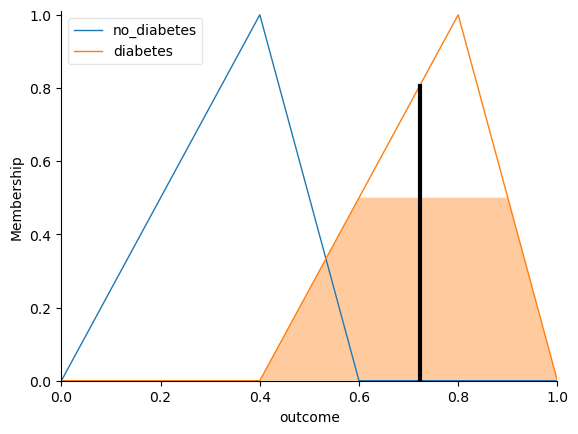

In [78]:
glucose = ctrl.Antecedent(np.arange(50, 200, 1), 'glucose')
pregnancies = ctrl.Antecedent(np.arange(0, 20, 1), 'pregnancies')
blood_pressure = ctrl.Antecedent(np.arange(60, 200, 1), 'blood_pressure')
insulin = ctrl.Antecedent(np.arange(0, 300, 1), 'insulin')
bmi = ctrl.Antecedent(np.arange(15, 60, 1), 'bmi')
pedigree = ctrl.Antecedent(np.arange(0, 3, 0.01), 'pedigree')
age = ctrl.Antecedent(np.arange(20, 100, 1), 'age')
outcome = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'outcome')


glucose['low'] = fuzz.trimf(glucose.universe, [50, 80, 100])
glucose['medium'] = fuzz.trimf(glucose.universe, [90, 120, 140])
glucose['high'] = fuzz.trimf(glucose.universe, [130, 160, 200])

pregnancies['low'] = fuzz.trimf(pregnancies.universe, [0, 1, 2])
pregnancies['medium'] = fuzz.trimf(pregnancies.universe, [1, 3, 5])
pregnancies['high'] = fuzz.trimf(pregnancies.universe, [4, 6, 17])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [60, 80, 90])
blood_pressure['medium'] = fuzz.trimf(blood_pressure.universe, [80, 100, 110])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [100, 120, 140])

insulin['low'] = fuzz.trimf(insulin.universe, [0, 10, 20])
insulin['medium'] = fuzz.trimf(insulin.universe, [14, 80, 166])
insulin['high'] = fuzz.trimf(insulin.universe, [140, 210, 300])

bmi['low'] = fuzz.trimf(bmi.universe, [15, 18, 20])
bmi['medium'] = fuzz.trimf(bmi.universe, [18, 25, 30])
bmi['high'] = fuzz.trimf(bmi.universe, [25, 35, 40])

pedigree['low'] = fuzz.trimf(pedigree.universe, [0, 0.2, 0.4])
pedigree['medium'] = fuzz.trimf(pedigree.universe, [0.3, 0.5, 0.6])
pedigree['high'] = fuzz.trimf(pedigree.universe, [0.5, 0.8, 1.0])

age['young'] = fuzz.trimf(age.universe, [20, 30, 40])
age['middle_aged'] = fuzz.trimf(age.universe, [35, 50, 60])
age['senior'] = fuzz.trimf(age.universe, [50, 70, 80])

outcome['no_diabetes'] = fuzz.trimf(outcome.universe, [0, 0.4, 0.6])
outcome['diabetes'] = fuzz.trimf(outcome.universe, [0.4, 0.8, 1])

rule1 = ctrl.Rule(glucose['high'] | insulin['high'], outcome['diabetes'])
rule2 = ctrl.Rule(glucose['high'] | insulin['low'], outcome['diabetes'])
rule2 = ctrl.Rule(glucose['low'] & insulin['medium'], outcome['no_diabetes'])
rule3 = ctrl.Rule(blood_pressure['high'] | bmi['high'], outcome['diabetes'])
rule4 = ctrl.Rule((blood_pressure['low'] | bmi['low']) & (age['young'] | glucose['low']), outcome['no_diabetes'])
rule5 = ctrl.Rule(pedigree['high'] | age['senior'], outcome['diabetes'])
rule6 = ctrl.Rule(pregnancies['high'] & glucose['high'], outcome['diabetes'])
rule7 = ctrl.Rule(bmi['low'] & (glucose['low'] | insulin['medium']), outcome['no_diabetes'])
rule8 = ctrl.Rule((bmi['medium'] & pedigree['medium']) | (age['middle_aged'] & glucose['medium']), outcome['no_diabetes'])
rule9 = ctrl.Rule(insulin['high'] & (glucose['high'] | bmi['high']), outcome['diabetes'])
rule10 = ctrl.Rule((insulin['medium'] & blood_pressure['low']) | (age['young'] & bmi['low']), outcome['no_diabetes'])

diabetes_ctrl = ctrl.ControlSystem([rule1, rule2])
diabetes_ctrl.addrule(rule3)
diabetes_ctrl.addrule(rule4)
diabetes_ctrl.addrule(rule5)
diabetes_ctrl.addrule(rule6)
diabetes_ctrl.addrule(rule7)
diabetes_ctrl.addrule(rule8)
diabetes_ctrl.addrule(rule9)
diabetes_ctrl.addrule(rule10)

diabetes = ctrl.ControlSystemSimulation(diabetes_ctrl)
diabetes.input['glucose'] = 140
diabetes.input['pregnancies'] = 8
diabetes.input['blood_pressure'] = 130
diabetes.input['insulin'] = 10
diabetes.input['bmi'] = 18
diabetes.input['pedigree'] = 0.5
diabetes.input['age'] = 60


diabetes.compute()
print(diabetes.output['outcome'])
outcome.view(sim=diabetes)